In [1]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt

Definir directorio de datos:

In [2]:
base_path = r"C:\Users\juanc\Google Drive\DS4All_Team28\Listado Estaciones IDEAM 1990-2020"
perfiles1_path = base_path + r"\perfil datos\pluviometrica_res_PTPM_CON_estacion_year.csv"
perfiles2_path = base_path + r"\perfil datos\pluviografica_PTPM_TT_M_estacion_year.csv"
cuencas_path = base_path + r"\est_pluviografica_pluviometrica_cuenca.csv"
deforestacion_path = base_path + "\FCL316Basins.csv"
estaciones_info_path = base_path + r"\Cat_logo_Nacional_de_Estaciones_del_IDEAM_active.csv"
print(perfiles1_path)

C:\Users\juanc\Google Drive\DS4All_Team28\Listado Estaciones IDEAM 1990-2020\perfil datos\pluviometrica_res_PTPM_CON_estacion_year.csv


Leer los datos básicos de las estaciones

In [3]:
estacion_dtypes = {
    "codigo": "string",
    "categoria": "category",
    "tecnologia": "category",
    "estado": "category",
    "departamento": "category",
    "municipio": "category",
    "area_operativa": "category",
    "corriente": "category",
    "area_hidrografica": "category",
    "zona_hidrografica": "category",
    "subzona_hidrografica": "category",
    "entidad": "category"
}
estaciones_info = pd.read_csv(
    estaciones_info_path,
    sep=",",
    dtype=estacion_dtypes,
    parse_dates=["fecha_instalacion", "fecha_suspension"],
    dayfirst=True,
    index_col="codigo"
)
 
estaciones_info.head()


,nombre,categoria,tecnologia,estado,departamento,municipio,ubicacion,altitud,fecha_instalacion,fecha_suspension,area_operativa,corriente,area_hidrografica,zona_hidrografica,subzona_hidrografica,entidad,x,y
codigo,,,,,,,,,,,,,,,,,,
44037040,EL ROSARIO - AUT,Limnigráfica,Automática con Telemetría,Activa,Caquetá,Florencia (Caquetá),"(1.72525, -75.66638889)",600,1964-08-15,NaT,Area Operativa 04 - Huila-Caquetá,CarañO,Amazonas,Caquetá,Río Orteguaza,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-75.666389,1.725250
52077020,LOS NORTES - AUT,Limnigráfica,Automática con Telemetría,Activa,Nariño,Cumbitara,"(1.74111111, -77.53111111)",340,1984-09-15,NaT,Area Operativa 07 - Nariño-Putumayo,Patia,Pacifico,Patía,Río Patia Medio,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-77.531111,1.741111
21017050,PITALITO 2 - AUT,Limnigráfica,Automática con Telemetría,Activa,Huila,Pitalito,"(1.84883333, -76.05244444)","1,25",1972-05-15,NaT,Area Operativa 04 - Huila-Caquetá,Guarapas,Magdalena Cauca,Alto Magdalena,Alto Magdalena,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-76.052444,1.848833
52077010,PUENTE PUSMEO - AUT,Limnigráfica,Automática con Telemetría,Activa,Nariño,Cumbitara,"(1.62405556, -77.47891667)",380,1965-09-15,NaT,Area Operativa 07 - Nariño-Putumayo,Patia,Pacifico,Patía,Río Patia Medio,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-77.478917,1.624056
51027060,SAN JUAN MIRA - AUT,Limnigráfica,Automática con Telemetría,Activa,Nariño,Tumaco,"(1.42388889, -78.67027778)",2,1980-12-15,NaT,Area Operativa 07 - Nariño-Putumayo,Mira,Pacifico,Mira,Río Mira,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-78.670278,1.423889


Lectura de la tabla que tiene el número de datos de Q_MEDIA_D por año para estaciones limnigráficas y limnimétricas y concatenación de las dos tablas

In [4]:
perfiles1_dtypes = {
    "CodigoEstacion":"string"
}
perfiles1 = pd.read_csv(perfiles1_path, dtype=perfiles1_dtypes)#, index_col = "CodigoEstacion")
#perfiles.dtypes
print(perfiles1.shape)
perfiles1.head(2)

(1543, 31)


,CodigoEstacion,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,11010010,365,364,364,365,365,364,365,359,365,...,365,366,365,365,365,366,365,365,365,145
1,11020010,365,366,364,365,365,366,364,365,365,...,365,366,365,365,365,366,365,365,242,31


In [5]:
perfiles2_dtypes = {
    "CodigoEstacion":"string"
}
perfiles2 = pd.read_csv(perfiles2_path, dtype=perfiles2_dtypes)#, index_col = "CodigoEstacion")
#perfiles.dtypes
print(perfiles2.shape)
perfiles2.head(2)

(144, 31)


,CodigoEstacion,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,11110020,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,5
1,11110110,12,12,12,12,12,12,12,12,12,...,5,0,0,0,0,0,0,0,0,0


In [6]:
perfiles = pd.concat([perfiles1, perfiles2],axis=0)
perfiles

,CodigoEstacion,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,11010010,365,364,364,365,365,364,365,359,365,...,365,366,365,365,365,366,365,365,365,145
1,11020010,365,366,364,365,365,366,364,365,365,...,365,366,365,365,365,366,365,365,242,31
2,11020020,365,366,363,365,365,337,365,168,0,...,0,0,0,0,0,0,0,0,0,0
3,11020050,365,366,365,365,365,366,365,161,92,...,365,366,337,365,364,366,365,365,365,118
4,11030030,364,366,358,365,364,365,365,365,364,...,120,181,50,0,31,178,207,290,113,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,52010100,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,5
140,52010190,0,0,0,5,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,3
141,52020180,0,0,0,0,11,12,12,12,12,...,12,12,12,12,12,12,12,12,6,0
142,52020190,0,0,0,6,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,5


Lectura de datos de cuenca a la que pertenece cada estación

In [7]:
cuencas_dtypes = {
    "CODIGO":"string",
    "CUENCA":"string"
}
cuencas = pd.read_csv(cuencas_path, sep=";", dtype = cuencas_dtypes)#, index_col = "codigo")
cuencas.rename(columns=str.lower, inplace=True)
print(cuencas.shape)
print(cuencas.dtypes)
cuencas.head(2)

(2088, 3)
codigo       string
elevacion     int64
cuenca       string
dtype: object


,codigo,elevacion,cuenca
0,11010010,98,199
1,11020010,1850,198


Lectura de datos de deforestación anual por cuenca:

In [8]:
deforestacion_dtypes = {
    "codigo":"string",
    "objectid_1":"string"
}
deforestacion = pd.read_csv(deforestacion_path, sep=";", dtype = deforestacion_dtypes)#, index_col = "codigo")
deforestacion = deforestacion.rename(columns={"objectid_1":"cuenca", "FCL 2019 (% acum)": "FCL2019_porc_acum"})
deforestacion.dtypes
print(deforestacion.shape)
deforestacion.tail(2)

(316, 88)


,cod_ah,cod_szh,cod_zh,nom_ah,nom_szh,nom_zh,cuenca,ruleid,shape_area,shape_leng,...,FCL 2010 (% acum),FCL 2011 (% acum),FCL 2012 (% acum),FCL 2013 (% acum),FCL 2014 (% acum),FCL 2015 (% acum),FCL 2016 (% acum),FCL 2017 (% acum),FCL 2018 (% acum),FCL2019_porc_acum
314,5,5310,53,Pacifico,R?o Anchicay?,Tapaje - Dagua - Directos,315,5,0.001038,0.144261,...,0.150%,0.167%,0.245%,0.251%,0.335%,0.335%,0.335%,0.335%,0.335%,0.335%
315,5,5309,53,Pacifico,R?os Cajambre - Mayorqu?n - Raposo,Tapaje - Dagua - Directos,316,5,0.001038,0.144261,...,0.150%,0.167%,0.245%,0.251%,0.335%,0.335%,0.335%,0.335%,0.335%,0.335%


Primero unimos datos de cuencas (listado de estaciones y deforestación)

In [9]:
#cuencas["cuenca"] = cuencas["cuenca"].astype(str)
#deforestacion["cuenca"] = deforestacion["cuenca"].astype(str)
print(cuencas["cuenca"].dtype, deforestacion["cuenca"].dtype)

string string


In [10]:
estaciones_ext = pd.merge(cuencas, deforestacion, how="left", on="cuenca")
print(estaciones_ext.shape)
estaciones_ext[["codigo", "cuenca", "FCL2019_porc_acum"]].tail(10)
#estaciones_ext["FCL2019_porc_acum"].isnull().sum()

(2088, 90)


,codigo,cuenca,FCL2019_porc_acum
2078,51020010,253,5.626%
2079,52010050,244,2.443%
2080,52010070,244,2.443%
2081,52010100,243,3.169%
2082,52020090,244,2.443%
2083,52020140,244,2.443%
2084,53100050,313,0.930%
2085,53100130,313,0.930%
2086,53100150,13,3.471%
2087,54030040,211,2.046%


In [11]:
print(estaciones_ext["codigo"].dtype, perfiles["CodigoEstacion"].dtype)


string string


Luego unimos los datos anuales de las estaciones

In [12]:
estaciones_comp = pd.merge(estaciones_ext, perfiles, how="left", left_on="codigo", right_on="CodigoEstacion")
print(estaciones_comp.shape)

cols_anios = [str(i) for i in range(1991,2020)]

estaciones_comp[["codigo", "cuenca", "FCL2019_porc_acum"] + cols_anios].head()
estaciones_comp.index = estaciones_comp['codigo']

(2088, 121)


Creamos una tabla con solo los datos que van en el heatmap 

In [45]:
data_to_plot = estaciones_comp[["cuenca"]+cols_anios]
#data_to_plot.index = estaciones_comp['codigo']
data_to_plot.head(20)

,cuenca,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
codigo,,,,,,,,,,,,,,,,,,,,,
11010010,199,365.0,364.0,364.0,365.0,365.0,364.0,365.0,359.0,365.0,...,365.0,365.0,366.0,365.0,365.0,365.0,366.0,365.0,365.0,365.0
11020010,198,365.0,366.0,364.0,365.0,365.0,366.0,364.0,365.0,365.0,...,365.0,365.0,366.0,365.0,365.0,365.0,366.0,365.0,365.0,242.0
11020050,198,365.0,366.0,365.0,365.0,365.0,366.0,365.0,161.0,92.0,...,365.0,365.0,366.0,337.0,365.0,364.0,366.0,365.0,365.0,365.0
11030030,197,364.0,366.0,358.0,365.0,364.0,365.0,365.0,365.0,364.0,...,365.0,120.0,181.0,50.0,0.0,31.0,178.0,207.0,290.0,113.0
11030040,197,0.0,114.0,365.0,364.0,365.0,365.0,365.0,359.0,365.0,...,365.0,365.0,366.0,364.0,365.0,365.0,366.0,365.0,365.0,363.0
11035020,197,327.0,363.0,365.0,364.0,348.0,337.0,365.0,365.0,365.0,...,364.0,365.0,365.0,361.0,260.0,356.0,331.0,365.0,365.0,365.0
11040010,196,363.0,305.0,359.0,365.0,365.0,366.0,365.0,358.0,365.0,...,364.0,365.0,366.0,365.0,365.0,365.0,365.0,365.0,365.0,329.0
11050010,194,365.0,366.0,365.0,365.0,365.0,366.0,365.0,360.0,363.0,...,365.0,365.0,366.0,365.0,365.0,363.0,365.0,365.0,365.0,272.0
11050030,193,365.0,366.0,364.0,365.0,357.0,366.0,365.0,359.0,365.0,...,365.0,365.0,366.0,365.0,365.0,359.0,366.0,364.0,365.0,365.0


Este primer heatmap tiene todavía las estaciones sin ningñun dato 

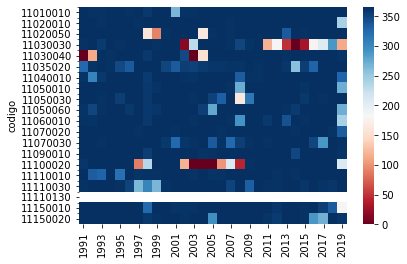

In [46]:
g = sns.heatmap(data_to_plot[cols_anios].head(20),  cmap='RdBu')
g.set_yticks(range(0,20), minor=True)
g.set_yticklabels(g.get_yticklabels(), fontsize = 10)
#g.set_yticklabels(g.get_yticklabels(), fontsize = 10, minor=True)
#g.set_yticklabels(g.get_yticklabels(), fontsize = 10, minor=False)
#g.tick_params(axis="y", labelsize=3)
plt.show()

Sacamos entonces esas estaciones qe no tienen datos:

In [47]:
#No hay necesidad si se hace INNER JOIN
print("Sin filtrar", data_to_plot.shape)
data_to_plot = data_to_plot[data_to_plot[cols_anios].isnull().sum(axis=1) < len(data_to_plot[cols_anios].columns)]
print("Filtrado", data_to_plot.shape)

Sin filtrar (2088, 30)
Filtrado (1319, 30)


Ahora definimos en que posición marcar la línea que separa las estaciones de cada cuenca

In [48]:
#Sacamos la cuenca correspondiente a cada fila de la tabla
#estaciones_comp.index = estaciones_comp['codigo']
codigo_cuenca = data_to_plot['cuenca'].astype(int)

In [53]:
codigo_cuenca.sort_index(axis=0, inplace=True)
#print(codigo_cuenca.head(10))

#Contamos cada cuanto debo añadir la linea en el heatmap
linea_cuenca = codigo_cuenca.groupby(codigo_cuenca, sort=True).count().cumsum()
#linea_cuenca.sort_index(axis=0, inplace=True)
linea_cuenca

cuenca
1         2
2         5
4         9
5        15
6        22
       ... 
308    1311
310    1314
312    1316
313    1317
314    1319
Name: cuenca, Length: 209, dtype: int64

Para mayor claridad, adjuntar el número de cuenca a la estación como etiquetas en el heatmap

In [54]:
data_to_plot.index = data_to_plot["cuenca"].apply(lambda x: str(x).zfill(3)) + "-" + data_to_plot.index
data_to_plot.sort_index(axis=0, inplace=True)
data_to_plot.index = data_to_plot.index + '-' +[str(x) for x in range(0,data_to_plot.shape[0])] 

data_to_plot.head(10)

,cuenca,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
001-17010010-0,1,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,9.0
001-17010020-1,1,364.0,213.0,337.0,365.0,365.0,361.0,365.0,365.0,365.0,...,365.0,360.0,365.0,359.0,365.0,364.0,366.0,365.0,337.0,360.0
002-17020020-2,2,365.0,366.0,365.0,365.0,234.0,333.0,245.0,270.0,182.0,...,363.0,365.0,307.0,154.0,365.0,365.0,366.0,365.0,365.0,365.0
002-17020030-3,2,364.0,365.0,364.0,365.0,335.0,366.0,363.0,364.0,361.0,...,365.0,364.0,366.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0
002-17020040-4,2,364.0,364.0,365.0,365.0,365.0,366.0,365.0,365.0,365.0,...,291.0,365.0,366.0,365.0,365.0,333.0,298.0,303.0,356.0,363.0
004-26020130-5,4,365.0,366.0,365.0,365.0,365.0,366.0,365.0,365.0,365.0,...,363.0,365.0,365.0,365.0,365.0,365.0,366.0,365.0,365.0,365.0
004-26020230-6,4,365.0,366.0,365.0,364.0,365.0,365.0,365.0,365.0,361.0,...,365.0,365.0,366.0,365.0,365.0,365.0,366.0,365.0,365.0,364.0
004-26020460-7,4,365.0,366.0,365.0,365.0,365.0,366.0,365.0,365.0,365.0,...,365.0,364.0,366.0,365.0,365.0,365.0,366.0,365.0,365.0,364.0
004-26030130-8,4,365.0,366.0,365.0,365.0,365.0,0.0,0.0,0.0,365.0,...,365.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
005-26020220-9,5,365.0,366.0,365.0,365.0,365.0,366.0,365.0,365.0,365.0,...,365.0,365.0,366.0,365.0,365.0,365.0,366.0,364.0,365.0,365.0


Finalmente hacemos el heatmap con esta tabla de estaciones para las que hay información: 

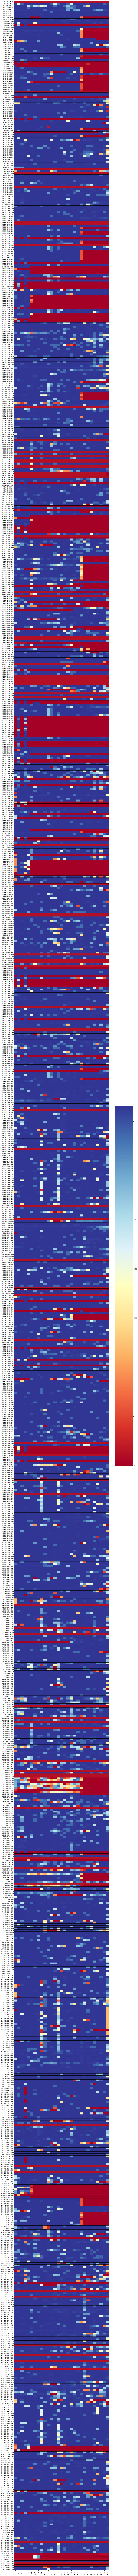

In [175]:
num_estaciones_ver = range(0,data_to_plot.shape[0])
#cuenca_inicial = 2
#cuenca_final = cuenca_inicial + 7
#print(linea_cuenca[cuenca_inicial]-1,linea_cuenca[cuenca_final])
#num_estaciones_ver = range(linea_cuenca[cuenca_inicial-1],linea_cuenca[cuenca_final])
plt.figure(figsize=(15, len(num_estaciones_ver) * 0.25))
ax = sns.heatmap(data_to_plot.iloc[num_estaciones_ver][cols_anios], cmap="RdYlBu")
ax.tick_params(axis="y", labelsize=8)
ax.hlines(linea_cuenca - num_estaciones_ver[0], *ax.get_xlim())
plt.show()

In [130]:
estacion_rev_idx = [22,24,25,31,36,39,44]
registro_min_dias = 150

columns_rev = ["nombre", "categoria", "departamento","municipio", "fecha_instalacion", "fecha_suspension"]
estacion_rev_cod = [x.split("-")[1] for x in data_to_plot.index[estacion_rev_idx]]
estaciones_info_rev = estaciones_info.loc[estacion_rev_cod, columns_rev]
estaciones_data_rev = estaciones_comp.loc[estacion_rev_cod,cols_anios]
estaciones_info_rev["anios<"+str(registro_min_dias)] = estaciones_data_rev.apply(lambda x: ",".join(estaciones_data_rev.columns[x < registro_min_dias]), axis = 1)
estaciones_info_rev.sort_values(["departamento","municipio","nombre"])

,nombre,categoria,departamento,municipio,fecha_instalacion,fecha_suspension,anios<150
codigo,,,,,,,
26090580,DOSQUEBRADAS,Pluviométrica,Valle del Cauca,Buga,1971-02-15,NaT,"2011,2012,2013,2014,2015,2016,2017,2018,2019"
26090560,CEJA LA,Pluviométrica,Valle del Cauca,El Cerrito,1971-02-15,NaT,"2002,2011,2012,2013,2014,2015,2016,2017,2018,2019"
26070610,SOLEDAD LA,Pluviométrica,Valle del Cauca,Florida,1971-03-15,NaT,"2011,2012,2013,2014,2015,2016,2017,2018,2019"
26070060,CAMPANELLA,Pluviométrica,Valle del Cauca,Palmira,1976-01-15,NaT,"1991,1993,1995,1996,1997,1998,1999,2000,2001,2..."
26090430,SAN NICOLAS,Pluviométrica,Valle del Cauca,Palmira,1969-08-15,NaT,"2002,2003,2004,2005,2006,2011,2012,2013,2014,2..."
26070110,ZAPATA LA,Pluviométrica,Valle del Cauca,Palmira,1965-03-15,NaT,"2017,2018"
26070590,BOLO BLANCO,Pluviométrica,Valle del Cauca,Pradera,1971-02-15,NaT,"2011,2012,2013,2014,2015,2016,2017,2018,2019"


In [128]:
data_to_plot[data_to_plot.index.str.contains("26070590")]

,cuenca,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
007-26070590-24,7,365.0,366.0,326.0,365.0,365.0,366.0,365.0,365.0,365.0,...,365.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
registro_min_dias = 300
estaciones_comp[f"min_{registro_min_dias}_dias"] = estaciones_comp[cols_anios].apply(lambda x: len(estaciones_comp[cols_anios].columns[x > registro_min_dias]), axis = 1)
estaciones_comp[f"todos_min_{registro_min_dias}_dias"] = ["SI" if x == len(cols_anios) else "NO" for x in estaciones_comp[f"min_{registro_min_dias}_dias"]]

In [172]:
#estaciones_comp[estaciones_comp.cuenca=="95"]
#estaciones_comp.head()
#estaciones_comp[["cuenca",f"todos_min_{registro_min_dias}_dias"]].groupby("cuenca")[f"todos_min_{registro_min_dias}_dias"].count()
pd.crosstab(estaciones_comp["cuenca"], estaciones_comp[f"todos_min_{registro_min_dias}_dias"])

todos_min_300_dias,NO,SI
cuenca,,
1,2,0
10,8,0
100,10,3
101,4,0
102,18,3
...,...,...
95,3,0
96,11,0
97,6,0
